In [5]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.1.0


In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [8]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.16899698,  0.49953113, -0.26410508,  0.00677916, -0.47494621,
        -0.30072383, -0.88850918,  0.08082779, -0.42223334, -0.11093475]])

In [9]:
tf.nn.softmax(predictions).numpy()

array([[0.13134971, 0.18280088, 0.08517954, 0.11168088, 0.06898714,
        0.08211679, 0.0456205 , 0.12026458, 0.07272121, 0.09927876]])

In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [11]:
loss_fn(y_train[:1], predictions).numpy()

2.499612808227539

In [12]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [13]:
fit_result = model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2948 - accuracy: 0.9143
Epoch 2/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1398 - accuracy: 0.9580
Epoch 3/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1030 - accuracy: 0.9685
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0839 - accuracy: 0.9740
Epoch 5/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0732 - accuracy: 0.9771


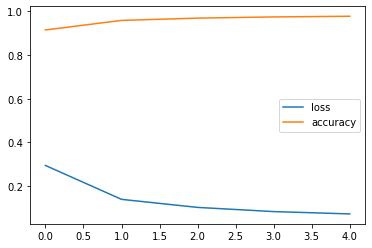

In [14]:
plt.plot(fit_result.history['loss'], label='loss')
plt.plot(fit_result.history['accuracy'], label='accuracy')
plt.legend()

In [15]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0734 - accuracy: 0.9775


[0.0733742387034004, 0.9775]

In [16]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [17]:
arr = probability_model(x_test[:20])

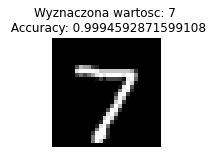

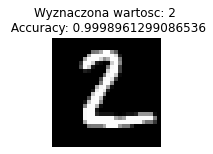

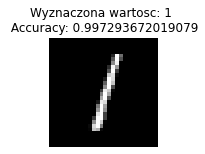

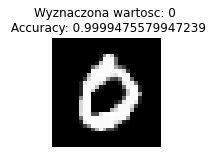

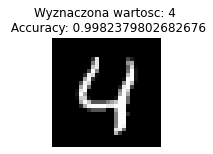

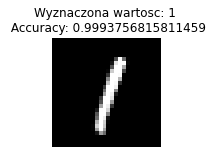

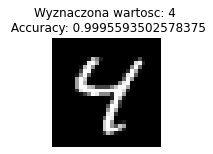

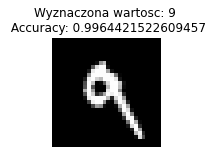

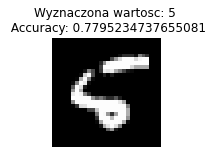

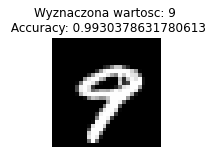

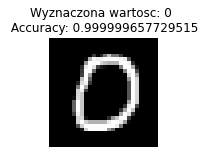

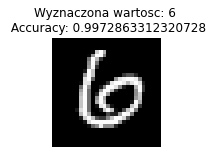

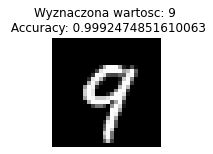

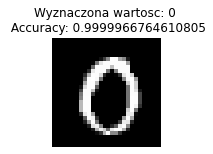

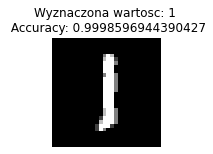

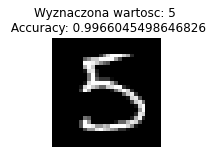

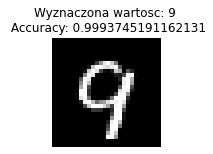

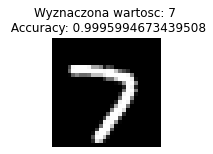

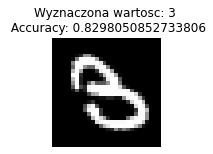

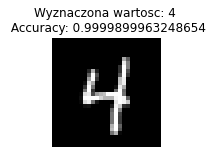

In [18]:
for x in range(len(arr)):
    value_old = 0
    for i in range(len(arr[x])): 
        
        tens = arr[x][i]
        
        
        
        if tens > value_old:
            var = i
            value = tens
            value_old = tens
            
 
    sample_image = np.array(x_test[x]) 
    sample_image = sample_image.reshape(28,28)
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.title('Wyznaczona wartosc: {} \n Accuracy: {}'.format(var,value))
    plt.imshow(sample_image, cmap = 'gray')